## Loading

Let's load an existing index (that was created with clip index)

In [25]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
from clip_retrieval.clip_back import load_clip_indices, KnnService, ClipOptions

In [51]:
clip_options = ClipOptions(
    indice_folder = "currently unused by knn.query()",
    clip_model = "open_clip:ViT-H-14",
    enable_hdf5 = False,
    enable_faiss_memory_mapping = True,
    columns_to_return = ["url", "caption"],
    reorder_metadata_by_ivf_index = False,
    enable_mclip_option = False,
    use_jit = False,
    use_arrow = True,
    provide_safety_model = False,
    provide_violence_detector =  False,
    provide_aesthetic_embeddings =  False,
)
columns = ["url", "caption"]
resources = load_clip_indices("/home/rom1504/indices_paths.json", clip_options)
knn_service = KnnService(clip_resources=resources)

IO_FLAG_ONDISK_SAME_DIR: updating ondisk filename from combined-indices/merged_index.ivfdata to /home/chris/Documents/clip_client/Laion5B_H14/image.index/merged_index.ivfdata


## Doing a query

Let's extract a subset of the dataset composed mostly of watermarked images

In [45]:
results = knn_service.query(text_input="watermark", num_images=1000, num_result_ids=1000)

In [46]:
import pandas as pd
url_captions = pd.DataFrame([(e['url'], e['caption']) for e in results], columns=["url", "caption"])

In [47]:
url_captions

,url,caption
0,http://lh3.googleusercontent.com/-q2Q0k45_bPA/...,Watermark Intellectual Asset Management
1,https://tallncurly.com/wp-content/uploads/2014...,TNC_feat_watermarks
2,https://tallncurly.com/wp-content/uploads/2014...,TNC_feat_watermarks
3,https://tallncurly.com/wp-content/uploads/2014...,TNC_feat_watermarks
4,https://www.civiq.com.au/wp-content/uploads/20...,An icons for WaterMark hygienic features
...,...,...
160,https://www.aoaophoto.com/images/save-text-wat...,save text watermark
161,https://magnusveteransfoundation.org/wp-conten...,watermark design logo
162,https://iseeocean.com/wp-content/uploads/job-m...,Watermark Surf House Espinho
163,http://a1.mzstatic.com/us/r30/Purple/v4/0d/04/...,eZy Watermark lite - iTunes App Ranking and Ap...


In [10]:
url_captions.to_parquet("/tmp/mysubset.parquet")

## Downloading

Finally let's download this subset

In [13]:
!img2dataset --input_format=parquet --url_list=/tmp/mysubset.parquet --output_folder=/tmp/myoutput --processes_count=16 --thread_count=64 --output_format=files --url_col="url" --caption_col="caption"

100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.00s/it]


In [15]:
!ls /tmp/myoutput/*

/tmp/myoutput/00000.parquet

/tmp/myoutput/00000:
0000.jpg   0143.jpg   0286.jpg	 0429.jpg   0572.jpg   0715.jpg   0858.jpg
0000.json  0143.json  0286.json  0429.json  0572.json  0715.json  0858.json
0000.txt   0143.txt   0286.txt	 0429.txt   0572.txt   0715.txt   0858.txt
0001.jpg   0144.jpg   0287.jpg	 0430.jpg   0573.jpg   0716.jpg   0859.jpg
0001.json  0144.json  0287.json  0430.json  0573.json  0716.json  0859.json
0001.txt   0144.txt   0287.txt	 0430.txt   0573.txt   0716.txt   0859.txt
0002.jpg   0145.jpg   0288.jpg	 0431.jpg   0574.jpg   0717.jpg   0860.jpg
0002.json  0145.json  0288.json  0431.json  0574.json  0717.json  0860.json
0002.txt   0145.txt   0288.txt	 0431.txt   0574.txt   0717.txt   0860.txt
0003.jpg   0146.jpg   0289.jpg	 0432.jpg   0575.jpg   0718.jpg   0861.jpg
0003.json  0146.json  0289.json  0432.json  0575.json  0718.json  0861.json
0003.txt   0146.txt   0289.txt	 0432.txt   0575.txt   0718.txt   0861.txt
0004.jpg   0147.jpg   0290.jpg	 0433.jpg   0576.jpg   

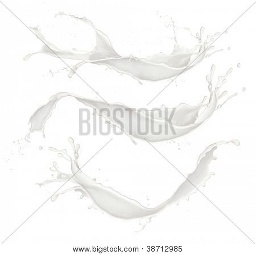

In [16]:
from IPython.display import Image
Image(filename='/tmp/myoutput/00000/0000.jpg') 